In [1]:
import functools as functools
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# generic function for calculating domain criterion robustness metric
def robustness(direction, threshold, data):
    if direction == SMALLER:
        return np.sum(data<=threshold)/data.shape[0]
    else:
        return np.sum(data>=threshold)/data.shape[0]

In [2]:
#all variables must be the amount stated or smaller
SMALLER = 'SMALLER'

#Expected Number of Deaths with a threshold of 0.001
A1_Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 0.001)
A2_Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 0.001)
A3_Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 0.001)
A4_Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 0.001)
A5_Expected_Number_of_Deaths = functools.partial(robustness, SMALLER, 0.001)

#Total costs with a maximum of 100 million
A1_Total_Costs = functools.partial(robustness, SMALLER, 100000000)
A2_Total_Costs = functools.partial(robustness, SMALLER, 100000000)
A3_Total_Costs = functools.partial(robustness, SMALLER, 100000000)
A4_Total_Costs = functools.partial(robustness, SMALLER, 100000000)
A5_Total_Costs = functools.partial(robustness, SMALLER, 100000000)

#Evacuation & Room for river maximum costs
Expected_Evacuation_Costs = functools.partial(robustness, SMALLER, 100000)
RfR_Total_Costs = functools.partial(robustness, SMALLER, 200000000)

In [3]:
from problem_formulation import get_model_for_problem_formulation
model, _ = get_model_for_problem_formulation(3)

from ema_workbench import ema_logging, MultiprocessingEvaluator, Samplers
ema_logging.log_to_stderr(ema_logging.INFO)

#calculation for 200 scenarios and 4 policies (20 has also been tested and done in the test phase of coding the evaluations
with MultiprocessingEvaluator(model) as evaluator:
    results = evaluator.perform_experiments(scenarios=200,
                                            policies=4,
                                            uncertainty_sampling=Samplers.MC)

[MainProcess/INFO] pool started with 4 workers
[MainProcess/INFO] performing 200 scenarios * 4 policies * 1 model(s) = 800 experiments
100%|████████████████████████████████████████| 800/800 [03:57<00:00,  3.37it/s]
[MainProcess/INFO] experiments finished
[MainProcess/INFO] terminating pool


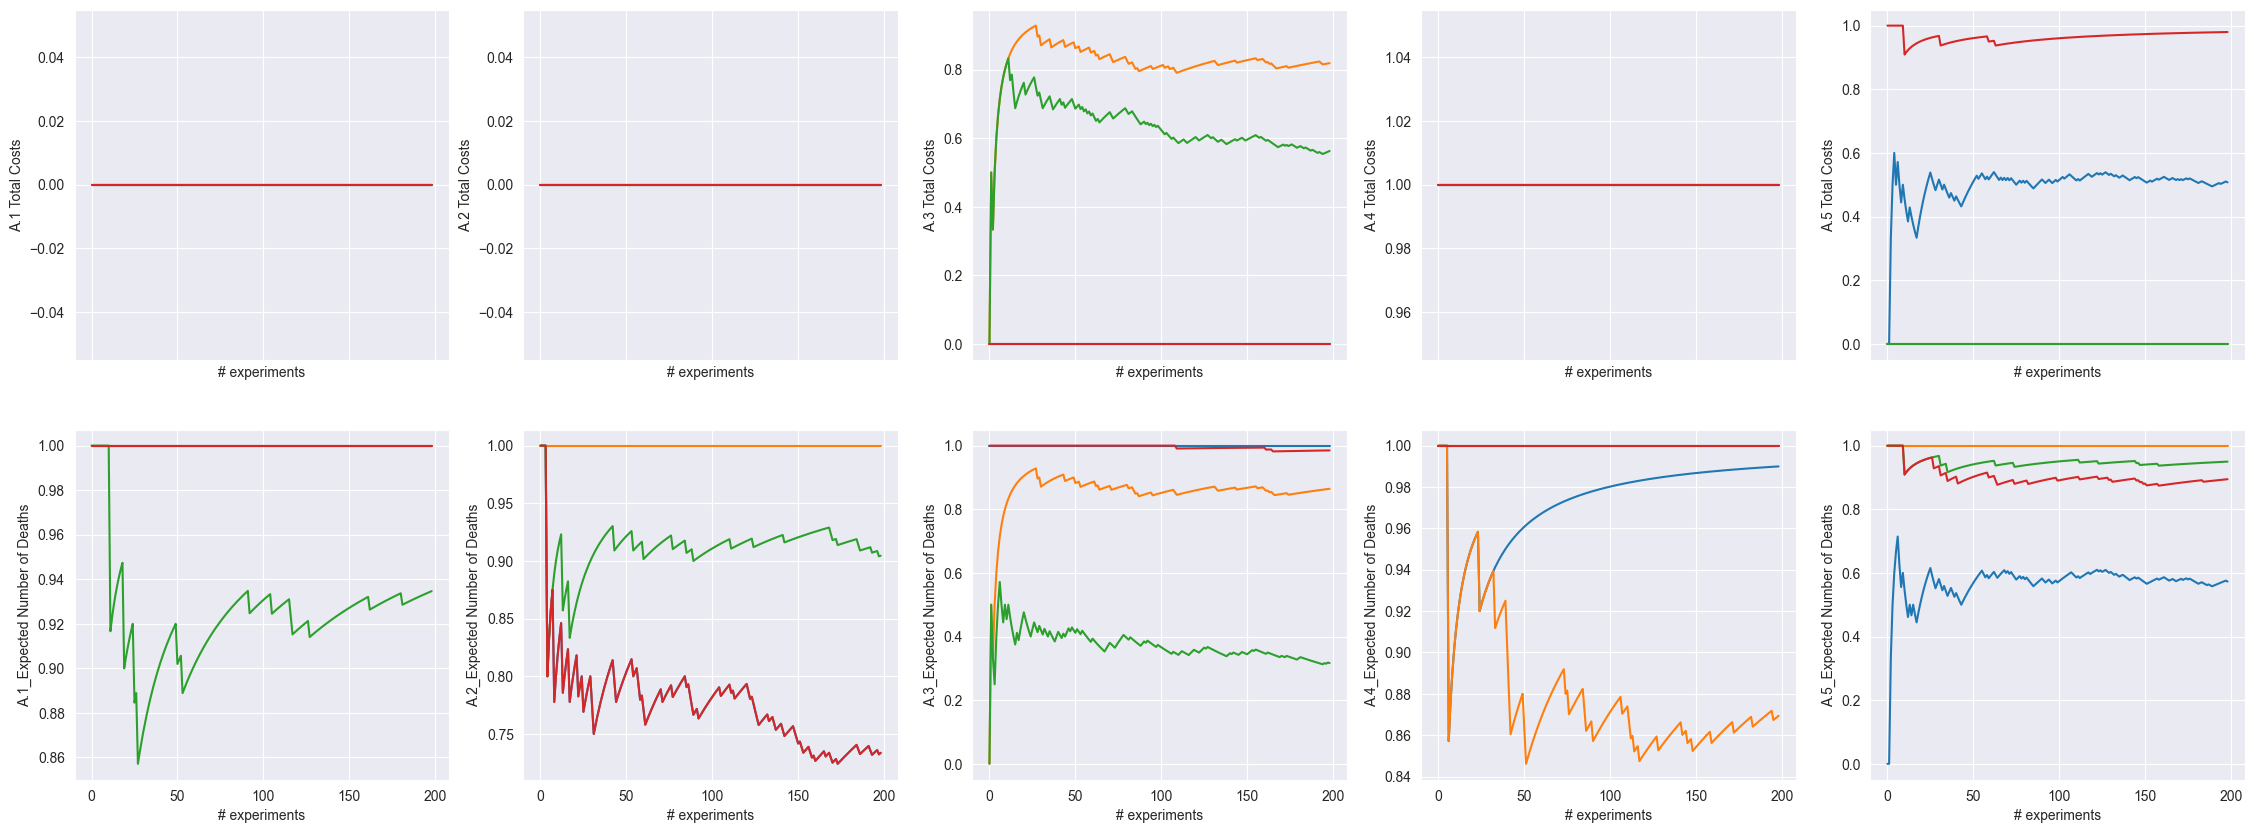

In [4]:
fig, axes = plt.subplots(ncols=5, nrows=2, figsize=(28,10), sharex=True)
#axes are in the following manner to have all the costs figures on one row and all the expected deaths on the second row
axes = [axes[0,0],axes[1,0],axes[0,1],axes[1,1,],axes[0,2],axes[1,2],axes[0,3],axes[1,3],axes[0,4],axes[1,4]]

functions_robustness = {"A.1_Expected Number of Deaths": A1_Expected_Number_of_Deaths,
                    "A.2_Expected Number of Deaths": A2_Expected_Number_of_Deaths,
                    "A.3_Expected Number of Deaths": A3_Expected_Number_of_Deaths,
                    "A.4_Expected Number of Deaths": A4_Expected_Number_of_Deaths,
                    "A.5_Expected Number of Deaths": A5_Expected_Number_of_Deaths,
                    "A.1 Total Costs": A1_Total_Costs,
                    "A.2 Total Costs": A2_Total_Costs,
                    "A.3 Total Costs": A3_Total_Costs,
                    "A.4 Total Costs": A4_Total_Costs,
                    "A.5 Total Costs": A5_Total_Costs,
#These functions will be used after the experiments plot
                    "RfR Total Costs": RfR_Total_Costs,
                    "Expected Evacuation Costs": Expected_Evacuation_Costs}

#setting up results of the experiments
experiments, outcomes = results

for ax, (outcome, value) in zip(axes, outcomes.items()):
    for policy in np.unique(experiments['policy']):
        logical = experiments['policy'] == policy
        data = value[logical]

        robustness = []

        for i in range(1, data.shape[0]):
            robustness.append(functions_robustness[outcome](data[0:i]))
        ax.plot(robustness, label=policy)
    ax.set_xlabel("# experiments")
    ax.set_ylabel(outcome)

In [5]:
#this has been set up to be used by the archivelogger. Unfortunately we did not get results
from ema_workbench.em_framework import sample_uncertainties
n_scenarios = 50
scenarios = sample_uncertainties(model, n_scenarios)

In [6]:
#this has been set up to be used by the archivelogger. Unfortunately we did not get results
from ema_workbench import (ScalarOutcome)

MINIMIZE = ScalarOutcome.MINIMIZE

functions_ScalarOutcomes = [ScalarOutcome('Fraction_A.1_Expected Number of Deaths', kind = MINIMIZE, variable_name = 'A1_Expected_Number_of_Deaths',
                                    function = A1_Expected_Number_of_Deaths),
                            ScalarOutcome('Fraction_A.2_Expected Number of Deaths', kind = MINIMIZE, variable_name = 'A2_Expected_Number_of_Deaths',
                                    function = A2_Expected_Number_of_Deaths),
                            ScalarOutcome('Fraction_A.3_Expected Number of Deaths', kind = MINIMIZE, variable_name = 'A3_Expected_Number_of_Deaths',
                                    function = A3_Expected_Number_of_Deaths),
                            ScalarOutcome('Fraction_A.4_Expected Number of Deaths', kind = MINIMIZE, variable_name = 'A4_Expected_Number_of_Deaths',
                                    function = A4_Expected_Number_of_Deaths),
                            ScalarOutcome('Fraction_A.5_Expected Number of Deaths', kind = MINIMIZE, variable_name = 'A5_Expected_Number_of_Deaths',
                                    function = A5_Expected_Number_of_Deaths),
                            ScalarOutcome('Fraction_A.1 Total Costs', kind = MINIMIZE, variable_name = 'A1_Total_Costs',
                                    function = A1_Total_Costs),
                            ScalarOutcome('Fraction_A.2 Total Costs', kind = MINIMIZE, variable_name = 'A2_Total_Costs',
                                    function = A2_Total_Costs),
                            ScalarOutcome('Fraction_A.3 Total Costs', kind = MINIMIZE, variable_name = 'A3_Total_Costs',
                                    function = A3_Total_Costs),
                            ScalarOutcome('Fraction_A.4 Total Costs', kind = MINIMIZE, variable_name = 'A4_Total_Costs',
                                    function = A4_Total_Costs),
                            ScalarOutcome('Fraction_A.5 Total Costs', kind = MINIMIZE, variable_name = 'A5_Total_Costs',
                                    function = A5_Total_Costs),
                            ScalarOutcome('Fraction_Expected Evacuation Costs', kind = MINIMIZE, variable_name = 'Expected_Evacuation_Costs',
                                    function = Expected_Evacuation_Costs),
                            ScalarOutcome('Fraction_RfR Total Costs', kind = MINIMIZE, variable_name = 'RfR_Total_Costs',
                                    function = RfR_Total_Costs),]

In [7]:
#due to archivelogger not getting to work for us, we proceeded by exploring the overall robustness of the total costs and expected deaths of the different dike locations
from ema_workbench.analysis import parcoords

experiments, outcomes = results

overall_robustness = {}
for policy in np.unique(experiments['policy']):
    policy_robustness = {}

    logical = experiments['policy'] == policy

    for outcome, values in outcomes.items():
        values = values[logical]
        policy_robustness[outcome] = functions_robustness[outcome](values)

    overall_robustness[policy] = policy_robustness

#adjusting the order of the codes
overall_robustness = pd.DataFrame(overall_robustness).T
data = overall_robustness.loc[:,['A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths', 'A.3_Expected Number of Deaths', 'A.4_Expected Number of Deaths', 'A.5_Expected Number of Deaths', 'A.1 Total Costs' ,'A.2 Total Costs', 'A.3 Total Costs', 'A.4 Total Costs', 'A.5 Total Costs', 'RfR Total Costs', 'Expected Evacuation Costs']]

C:\Users\Gebruiker\AppData\Local\Programs\Python\Python310\lib\site-packages\ema_workbench\analysis\prim.py:30: ImportWarning: altair based interactive inspection not available
  warnings.warn(("altair based interactive " "inspection not available"), ImportWarning)


In [8]:
display(overall_robustness)

,A.1 Total Costs,A.1_Expected Number of Deaths,A.2 Total Costs,A.2_Expected Number of Deaths,A.3 Total Costs,A.3_Expected Number of Deaths,A.4 Total Costs,A.4_Expected Number of Deaths,A.5 Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs
0,0.0,1.000,0.0,0.735,0.000,1.000,1.0,0.99,0.505,0.570,0.0,1.0
1,0.0,1.000,0.0,1.000,0.820,0.865,1.0,0.87,0.000,1.000,0.0,1.0
2,0.0,0.935,0.0,0.905,0.565,0.315,1.0,1.00,0.000,0.950,0.0,1.0
3,0.0,1.000,0.0,0.735,0.000,0.985,1.0,1.00,0.980,0.895,0.0,1.0


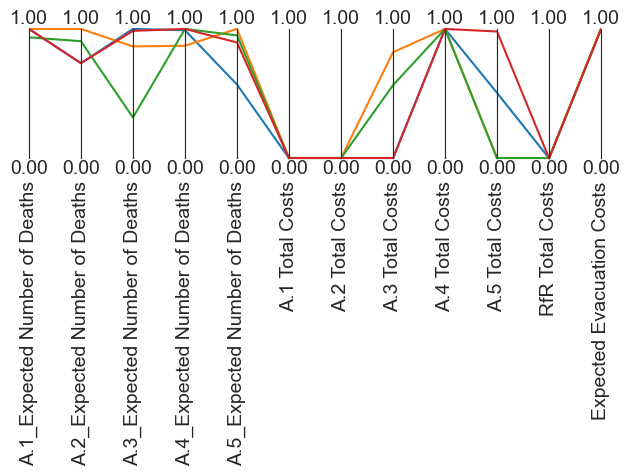

In [9]:
limits = parcoords.get_limits(data)
limits.loc[0, :] = 0
limits.loc[1, :] = 1

paraxes = parcoords.ParallelAxes(limits)
paraxes.plot(data)
plt.show()

In [10]:
#splitting the experiments data in different sets differentiated by the costs, deaths and other costs
data['policy'] = experiments['policy']

data_costs=data[['A.1 Total Costs', 'A.2 Total Costs', 'A.3 Total Costs', 'A.4 Total Costs', 'A.5 Total Costs']]
data_deaths=data[['A.1_Expected Number of Deaths', 'A.2_Expected Number of Deaths' ,'A.3_Expected Number of Deaths', 'A.4_Expected Number of Deaths', 'A.5_Expected Number of Deaths']]
data_extra=data[['RfR Total Costs', 'Expected Evacuation Costs']]

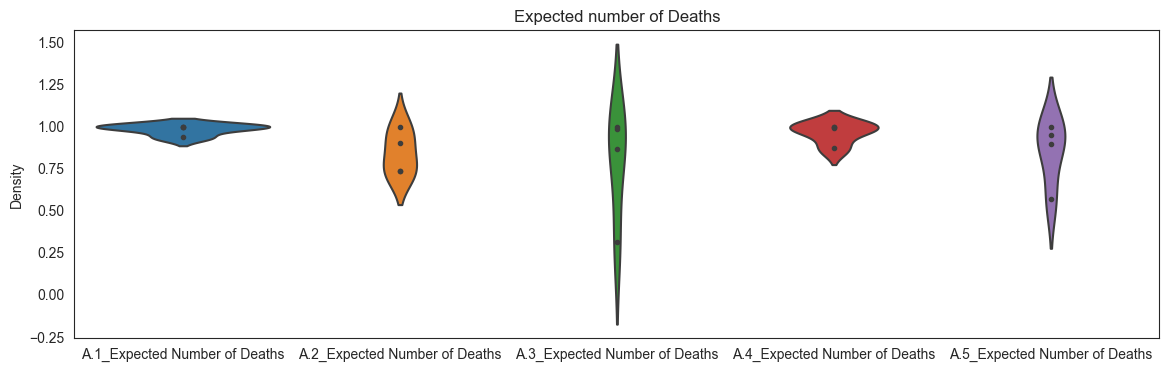

In [11]:
#violinplot which shows the density of the expected number of deaths respectively, other two violonplots are executed in the same manner
plt.figure(figsize=(14,4))
plt.title('Expected number of Deaths')
plt.ylabel('Density')
sns.violinplot(data=data_deaths, inner="points")
plt.show()

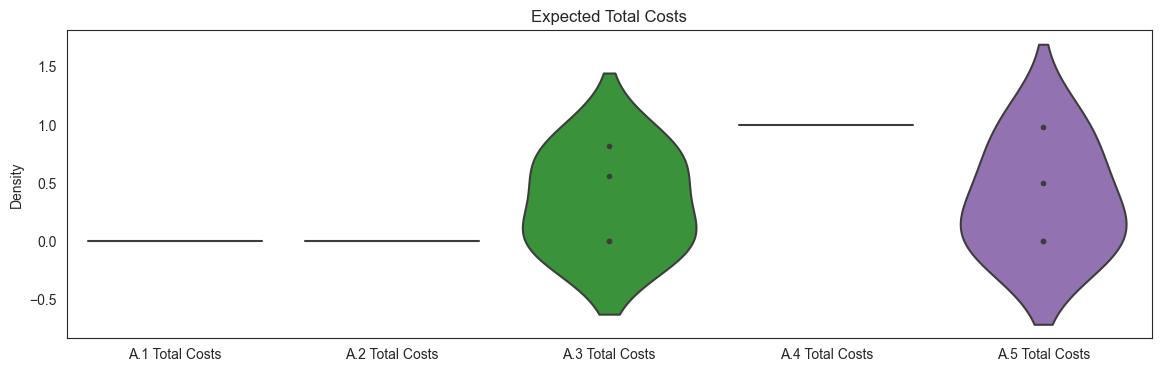

In [12]:
plt.show()
plt.figure(figsize=(14, 4))
plt.title('Expected Total Costs')
plt.ylabel('Density')
sns.violinplot(data=data_costs, inner="points")
plt.show()

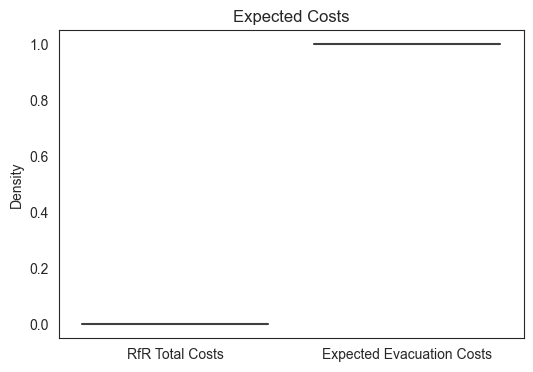

In [13]:
plt.show()
plt.figure(figsize=(6, 4))
plt.title('Expected Costs')
plt.ylabel('Density')
sns.violinplot(data=data_extra, inner="points")
plt.show()

In [14]:
#Since we did not get acrhivelogger to work, we tried to avoid it by directly connecting epsilons to the Scalaroutcomes.
#Unfortunately we could not get it work even by increasing epsilons. The code would just keep running. The following code was tried:

#from ema_workbench.em_framework.optimization import EpsilonProgress

#with MultiprocessingEvaluator(model) as evaluator:
#results, convergence = evaluator.robust_optimize(functions_ScalarOutcomes, scenarios,
# nfe=100000, convergence=[EpsilonProgress()],
# epsilons=[5000000000,]*len(functions_ScalarOutcomes))

